In [486]:
import pandas as pd
import thinkplot
import numpy as np
import re
import thinkstats2

In [270]:
header_names = ['Occupation', 'Total Number of workers', 'Total Median weekly earnings', 'Men Number of workers', 'Men Median weekly earnings', 'Women Number of workers', 'Women Median weekly earnings']

Attempt to read in txt files

In [317]:
df_2009_raw = pd.read_fwf('Data/weeklyincome_occupation_gender_2009.txt', names=header_names)

In [318]:
df_2009_raw.head()

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total fulltime wage and salary workers...........,"99,820",$739,"55,108",$819,"44,712",$657
2,"Management, professional, and related occupati...","39,080","1,044","18,928","1,248","20,152",907
3,"Management, business, and financial operations...","15,879","1,138","8,635","1,334","7,244",955
4,Management occupations...........................,"10,907","1,208","6,508","1,384","4,399","1,002"


In [249]:
# Drop rows with no occupation
df_2009_raw = df_2009_raw[df_2009_raw['Occupation'].notnull()]
df_2009_raw.head()

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
1,Total fulltime wage and salary workers...........,"99,820",$739,"55,108",$819,"44,712",$657
2,"Management, professional, and related occupati...","39,080","1,044","18,928","1,248","20,152",907
3,"Management, business, and financial operations...","15,879","1,138","8,635","1,334","7,244",955
4,Management occupations...........................,"10,907","1,208","6,508","1,384","4,399","1,002"
5,Chief executives.................................,"1,105","1,916",837,"2,084",268,"1,553"


In [260]:
df_2009_raw['Occupation'] = df_2009_raw['Occupation'].apply(clean_name)
df_2009_raw.head()

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
1,Total fulltime wage and salary workers,"99,820",$739,"55,108",$819,"44,712",$657
2,Management professional and related occupations,"39,080","1,044","18,928","1,248","20,152",907
3,Management business and financial operations o...,"15,879","1,138","8,635","1,334","7,244",955
4,Management occupations,"10,907","1,208","6,508","1,384","4,399","1,002"
5,Chief executives,"1,105","1,916",837,"2,084",268,"1,553"


In [261]:
df_2009_raw[35:40]

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
36,Purchasing agents except wholesale retail and ...,216,863,103,999,114,783
37,Claims adjusters appraisers examiners and inve...,253,941,98,"1,128",155,845
38,Compliance officers except agriculture constru...,NaN,NaN,NaN,NaN,NaN,NaN
39,safety and transportation,192,"1,083",93,"1,162",99,970
40,Cost estimators,104,"1,027",89,"1,050",15,(1)


In [262]:
df_2009_occ_names = df_2009_raw[df_2009_raw['Total Number of workers'].isnull()]
df_2009_occ_names.head()

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
38,Compliance officers except agriculture constru...,NaN,NaN,NaN,NaN,NaN,NaN
232,Firstline supervisorsmanagers of landscaping l...,NaN,NaN,NaN,NaN,NaN,NaN
281,Firstline supervisorsmanagers of office and ad...,NaN,NaN,NaN,NaN,NaN,NaN
346,Firstline supervisorsmanagers of construction ...,NaN,NaN,NaN,NaN,NaN,NaN
392,Electrical and electronics installers and repa...,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
for ind in df_2009_occ_names.index:
    df_2009_raw.loc[ind+1]['Occupation'] = df_2009_raw.loc[ind]['Occupation']+df_2009_raw.loc[ind+1]['Occupation']

In [265]:
df_2009_raw = df_2009_raw[df_2009_raw['Total Number of workers'].notnull()]
df_2009_raw[35:40]

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
36,Purchasing agents except wholesale retail and ...,216,863,103,999,114,783
37,Claims adjusters appraisers examiners and inve...,253,941,98,"1,128",155,845
39,Compliance officers except agriculture constru...,192,"1,083",93,"1,162",99,970
40,Cost estimators,104,"1,027",89,"1,050",15,(1)
41,Human resources training and labor relations s...,765,918,226,"1,103",539,845


In [266]:
# Replace (1) and - with NaN
df_2009_raw = df_2009_raw.replace('(1)', np.nan)
df_2009_raw = df_2009_raw.replace('-', np.nan)
df_2009_raw[35:40]

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
36,Purchasing agents except wholesale retail and ...,216,863,103,999,114,783
37,Claims adjusters appraisers examiners and inve...,253,941,98,"1,128",155,845
39,Compliance officers except agriculture constru...,192,"1,083",93,"1,162",99,970
40,Cost estimators,104,"1,027",89,"1,050",15,NaN
41,Human resources training and labor relations s...,765,918,226,"1,103",539,845


In [268]:
df_2009_raw = df_2009_raw.dropna()
df_2009_raw[35:40]

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
66,Network systems and data communications analysts,342,"1,147",265,"1,187",77,"1,032"
72,Architecture and engineering occupations,"2,397","1,266","2,076","1,318",321,"1,061"
92,Engineering technicians except drafters,330,937,274,959,56,799
94,Life physical and social science occupations,"1,106","1,059",625,"1,190",481,940
98,Medical scientists,155,"1,102",68,"1,388",87,975


In [277]:
# Clean values
for header in header_names[1:]:
    df_2009_raw[header] = df_2009_raw[header].apply(clean_val)
df_2009_raw.head()

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
1,Total fulltime wage and salary workers,99820,739,55108,819,44712,657
2,Management professional and related occupations,39080,1044,18928,1248,20152,907
3,Management business and financial operations o...,15879,1138,8635,1334,7244,955
4,Management occupations,10907,1208,6508,1384,4399,1002
5,Chief executives,1105,1916,837,2084,268,1553


In [278]:
df_2009_raw.to_excel('Data/weeklyincome_occupation_gender_clean_'+str(2009)+'.xlsx')

Beautify occupation names

In [404]:
def clean_name(x):
    if type(x) != str:
        x = str(x)
    x = re.sub(r'([^\s\w]|_)+', '', x)
    x = x.lower()
    return x.capitalize()

In [226]:
def clean_val(val):
    if type(val) == str:
        val = val.replace('$', '')
        val = val.replace(',', '')
        val = int(val)
    return val

Save DataFrame as excel

In [288]:
def get_header_names(yr):
    new_header_names = []
    header_names = ['Occupation', 'Total Number of workers', 'Total Median weekly earnings', 'Men Number of workers', 'Men Median weekly earnings', 'Women Number of workers', 'Women Median weekly earnings']
    for header in header_names:
        if header == 'Occupation':
            new_header_names.append(header)
        else:
            new_header_names.append(str(yr)+' '+header)
    return new_header_names

In [291]:
def clean_txt(yr):
    header_names = get_header_names(yr)
    df_raw = pd.read_fwf('Data/weeklyincome_occupation_gender_'+str(yr)+'.txt', names=header_names)
    # Drop rows with no occupation
    df_raw = df_raw[df_raw['Occupation'].notnull()]
    # Clean occupation names
    df_raw['Occupation'] = df_raw['Occupation'].apply(clean_name)
    # Consolidate rows with really long occ names
    df_occ_names = df_raw[df_raw[str(yr)+' Total Number of workers'].isnull()]
    for ind in df_occ_names.index:
        df_raw.loc[ind+1]['Occupation'] = df_raw.loc[ind]['Occupation']+df_raw.loc[ind+1]['Occupation']
    df_raw = df_raw[df_raw[str(yr)+' Total Number of workers'].notnull()]
    # Replace (1) and - with NaN
    df_raw = df_raw.replace('(1)', np.nan)
    df_raw = df_raw.replace('-', np.nan)
    df_raw = df_raw.dropna()
    # Clean values
    for header in header_names[1:]:
        df_raw[header] = df_raw[header].apply(clean_val)
    df_raw.to_excel('Data/weeklyincome_occupation_gender_clean_'+str(yr)+'.xlsx')
    return df_raw

In [292]:
df = clean_txt(2009)
df.iloc[7]

Occupation                           Computer and information systems managers
2009 Total Number of workers                                               441
2009 Total Median weekly earnings                                         1726
2009 Men Number of workers                                                 319
2009 Men Median weekly earnings                                           1788
2009 Women Number of workers                                               122
2009 Women Median weekly earnings                                         1411
Name: 12, dtype: object

In [319]:
years = range(2002, 2011)
for yr in years:
    clean_txt(yr)

Combine the data from 2002 to 2010

In [331]:
years = range(2003, 2011)
dfs = {}
for yr in years:
    df = pd.read_excel('Data/weeklyincome_occupation_gender_clean_'+str(yr)+'.xlsx', index=False)
    df = df.set_index('Occupation')
    dfs[yr] = df

In [332]:
df_combined = dfs[2010]
for yr in reversed(years[:-1]):
    df_combined = pd.concat([df_combined, dfs[yr]], axis=1, join_axes=[df_combined.index])
df_combined.head()

,2010 Total Number of workers,2010 Total Median weekly earnings,2010 Men Number of workers,2010 Men Median weekly earnings,2010 Women Number of workers,2010 Women Median weekly earnings,2009 Total Number of workers,2009 Total Median weekly earnings,2009 Men Number of workers,2009 Men Median weekly earnings,...,2004 Men Number of workers,2004 Men Median weekly earnings,2004 Women Number of workers,2004 Women Median weekly earnings,2003 Total Number of workers,2003 Total Median weekly earnings,2003 Men Number of workers,2003 Men Median weekly earnings,2003 Women Number of workers,2003 Women Median weekly earnings
Occupation,,,,,,,,,,,,,,,,,,,,,
Total fulltime wage and salary workers,99531,747,55059,824,44472,669,99820.0,739.0,55108.0,819.0,...,57001.0,713.0,44223.0,573.0,100302.0,620.0,56227.0,695.0,44076.0,552.0
Management professional and related occupations,39145,1063,19009,1256,20136,923,39080.0,1044.0,18928.0,1248.0,...,17981.0,1098.0,18168.0,780.0,35680.0,887.0,17718.0,1059.0,17962.0,758.0
Management business and financial operations occupations,15648,1155,8552,1363,7096,971,15879.0,1138.0,8635.0,1334.0,...,8170.0,1158.0,6609.0,812.0,14493.0,961.0,8047.0,1143.0,6446.0,799.0
Management occupations,10743,1230,6376,1414,4368,1018,10907.0,1208.0,6508.0,1384.0,...,6226.0,1215.0,3995.0,871.0,10115.0,1023.0,6143.0,1172.0,3973.0,849.0
Chief executives,1034,1949,769,2217,265,1598,1105.0,1916.0,837.0,2084.0,...,802.0,1875.0,248.0,1310.0,1040.0,1558.0,796.0,1736.0,244.0,1243.0


In [333]:
df_combined = df_combined.dropna()

In [334]:
df_combined.to_excel('Data/weeklyincome_occupation_gender_combined2_v2.xlsx')

In [335]:
df_combined = pd.read_excel('Data/weeklyincome_occupation_gender_combined2_v2.xlsx')
df_combined = df_combined.set_index('Occupation')
df_combined.head()

,2010 Total Number of workers,2010 Total Median weekly earnings,2010 Men Number of workers,2010 Men Median weekly earnings,2010 Women Number of workers,2010 Women Median weekly earnings,2009 Total Number of workers,2009 Total Median weekly earnings,2009 Men Number of workers,2009 Men Median weekly earnings,...,2004 Men Number of workers,2004 Men Median weekly earnings,2004 Women Number of workers,2004 Women Median weekly earnings,2003 Total Number of workers,2003 Total Median weekly earnings,2003 Men Number of workers,2003 Men Median weekly earnings,2003 Women Number of workers,2003 Women Median weekly earnings
Occupation,,,,,,,,,,,,,,,,,,,,,
Total fulltime wage and salary workers,99531,747,55059,824,44472,669,99820,739,55108,819,...,57001,713,44223,573,100302,620,56227,695,44076,552
Management professional and related occupations,39145,1063,19009,1256,20136,923,39080,1044,18928,1248,...,17981,1098,18168,780,35680,887,17718,1059,17962,758
Management business and financial operations occupations,15648,1155,8552,1363,7096,971,15879,1138,8635,1334,...,8170,1158,6609,812,14493,961,8047,1143,6446,799
Management occupations,10743,1230,6376,1414,4368,1018,10907,1208,6508,1384,...,6226,1215,3995,871,10115,1023,6143,1172,3973,849
Chief executives,1034,1949,769,2217,265,1598,1105,1916,837,2084,...,802,1875,248,1310,1040,1558,796,1736,244,1243


Go through every occupation and find proportion of women workers and median weekly pay (total, female, and male)

In [336]:
df_combined_new2 = pd.DataFrame(index=df_combined.index)
# get all of the Total Number of workers and Women Number of workers
df_combined_new2['Percent Female'] = pd.Series()
df_combined_new2['Total Weekly Pay'] = pd.Series()
df_combined_new2['Female Weekly Pay'] = pd.Series()
df_combined_new2['Male Weekly Pay'] = pd.Series()
# Find percent female for year and create arrays of column names
percent_female_names = []
total_weekly_pay_names = []
female_weekly_pay_names = []
male_weekly_pay_names = []

years = range(2010, 2002, -1)
for yr in years:
    total_num = df_combined[str(yr)+' Total Number of workers']
    female_num = df_combined[str(yr)+' Women Number of workers']
    df_combined[str(yr)+' Percent Female'] = (female_num/total_num)*100
    percent_female_names.append(str(yr)+' Percent Female')
    total_weekly_pay_names.append(str(yr)+' Total Median weekly earnings')
    female_weekly_pay_names.append(str(yr)+' Women Median weekly earnings')
    male_weekly_pay_names.append(str(yr)+' Men Median weekly earnings')

In [337]:
# Append columns
df_combined_new2['Percent Female'] = df_combined[percent_female_names].values.tolist()
df_combined_new2['Total Weekly Pay'] = df_combined[total_weekly_pay_names].values.tolist()
df_combined_new2['Female Weekly Pay'] = df_combined[female_weekly_pay_names].values.tolist()
df_combined_new2['Male Weekly Pay'] = df_combined[male_weekly_pay_names].values.tolist()

In [338]:
df_combined_new2.head()

,Percent Female,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay
Occupation,,,,
Total fulltime wage and salary workers,"[44.68155649998493, 44.792626728110605, 44.266...","[747, 739, 722, 695, 671, 651, 638, 620]","[669, 657, 638, 614, 600, 585, 573, 552]","[824, 819, 798, 766, 743, 722, 713, 695]"
Management professional and related occupations,"[51.43951973432112, 51.566018423746165, 51.140...","[1063, 1044, 1025, 996, 967, 937, 918, 887]","[923, 907, 892, 858, 840, 813, 780, 758]","[1256, 1248, 1238, 1187, 1154, 1113, 1098, 1059]"
Management business and financial operations occupations,"[45.347648261758685, 45.62000125952516, 45.757...","[1155, 1138, 1128, 1080, 1045, 997, 965, 961]","[971, 955, 941, 908, 881, 847, 812, 799]","[1363, 1334, 1343, 1261, 1231, 1167, 1158, 1143]"
Management occupations,"[40.65903378944429, 40.331896946914824, 40.408...","[1230, 1208, 1204, 1161, 1127, 1083, 1052, 1023]","[1018, 1002, 979, 963, 926, 902, 871, 849]","[1414, 1384, 1384, 1337, 1264, 1230, 1215, 1172]"
Chief executives,"[25.62862669245648, 24.25339366515837, 24.0421...","[1949, 1916, 1903, 1882, 1875, 1834, 1663, 1558]","[1598, 1553, 1603, 1536, 1422, 1413, 1310, 1243]","[2217, 2084, 1999, 1918, 1907, 1903, 1875, 1736]"


In [339]:
df_combined_new2.to_excel('Data/weeklyincome_occupation_gender_combined_clean_2002codes.xlsx')

In [104]:
def clean_excel(yr):
    df_raw = pd.read_excel('Data/weeklyincome_occupation_gender_'+str(yr)+'.xlsx')
    # drop rows with no occupation
    df_raw = df_raw.dropna()
    # clean occupation names
    df_raw['Occupation'] = df_raw['Occupation'].apply(clean_name)
    # Replace '–' with NaN
    df_raw = df_raw.replace('–', np.nan)
    df_raw = df_raw.replace('-', np.nan)
    df_raw = df_raw.dropna()
    # Write to excel
    df_raw.to_excel('Data/weeklyincome_occupation_gender_clean_'+str(yr)+'.xlsx')
    return df_raw

In [105]:
df = clean_excel(2014)
df.iloc[7]

Occupation                           Computer and information systems managers
2014 Total Number of workers                                               623
2014 Total Median weekly earnings                                        1,730
2014 Men Number of workers                                                 453
2014 Men Median weekly earnings                                          1,763
2014 Women Number of workers                                               169
2014 Women Median weekly earnings                                        1,529
Name: 11, dtype: object

In [86]:
df.tail()

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
539,Bus drivers,361.0,655.0,216.0,735.0,144.0,599.0
540,Driversales workers and truck drivers,2791.0,817.0,2636.0,829.0,155.0,559.0
541,Taxi drivers and chauffeurs,399.0,611.0,341.0,628.0,58.0,450.0
562,Laborers and freight stock and material movers...,1595.0,603.0,1277.0,620.0,318.0,541.0
564,Packers and packagers hand,490.0,495.0,205.0,516.0,285.0,484.0


Clean excel years 2011 to 2018

In [106]:
years = range(2011, 2019)
for yr in years:
    clean_excel(yr)

Read in data with occupation as index

In [107]:
df_2018 = pd.read_excel('Data/weeklyincome_occupation_gender_clean_2018.xlsx', index=False)
df_2018 = df_2018.set_index('Occupation')
df_2018.head()

,2018 Total Number of workers,2018 Total Median weekly earnings,2018 Men Number of workers,2018 Men Median weekly earnings,2018 Women Number of workers,2018 Women Median weekly earnings
Occupation,,,,,,
Total fulltime wage and salary workers,115567,886,64142,973,51425,789
Management professional and related occupations,48808,1246,23685,1468,25123,1078
Management business and financial operations occupations,19863,1355,10668,1537,9195,1168
Management occupations,13477,1429,7754,1585,5724,1236
Chief executives,1098,2291,790,2488,307,1736


In [108]:
years = range(2011, 2019)
dfs = {}
for yr in years:
    df = pd.read_excel('Data/weeklyincome_occupation_gender_clean_'+str(yr)+'.xlsx', index=False)
    df = df.set_index('Occupation')
    dfs[yr] = df

Combine two DataFrames

In [118]:
df_combined = dfs[2018]
for yr in reversed(years[:-1]):
    df_combined = pd.concat([df_combined, dfs[yr]], axis=1, join_axes=[df_combined.index])
df_combined.head()

,2018 Total Number of workers,2018 Total Median weekly earnings,2018 Men Number of workers,2018 Men Median weekly earnings,2018 Women Number of workers,2018 Women Median weekly earnings,2017 Total Number of workers,2017 Total Median weekly earnings,2017 Men Number of workers,2017 Men Median weekly earnings,...,2012 Men Number of workers,2012 Men Median weekly earnings,2012 Women Number of workers,2012 Women Median weekly earnings,2011 Total Number of workers,2011 Total Median weekly earnings,2011 Men Number of workers,2011 Men Median weekly earnings,2011 Women Number of workers,2011 Women Median weekly earnings
Occupation,,,,,,,,,,,,,,,,,,,,,
Total fulltime wage and salary workers,115567,886,64142,973,51425,789,113272.0,860.0,62980.0,941.0,...,57286.0,$854,45462.0,$691,100457.0,$756,55971.0,$832,44486.0,$684
Management professional and related occupations,48808,1246,23685,1468,25123,1078,47207.0,1224.0,22815.0,1442.0,...,19926.0,"1,328",21059.0,951,39791.0,"1,082",19267.0,"1,269",20524.0,941
Management business and financial operations occupations,19863,1355,10668,1537,9195,1168,19414.0,1327.0,10415.0,1526.0,...,9121.0,"1,387",7869.0,993,16061.0,"1,160",8676.0,"1,370",7386.0,977
Management occupations,13477,1429,7754,1585,5724,1236,13169.0,1392.0,7568.0,1573.0,...,6783.0,"1,428",4765.0,"1,036",10891.0,"1,237",6451.0,"1,427",4440.0,"1,018"
Chief executives,1098,2291,790,2488,307,1736,1136.0,2296.0,823.0,2415.0,...,739.0,"2,275",265.0,"1,730",990.0,"1,963",745.0,"2,122",245.0,"1,464"


In [120]:
df_combined = df_combined.dropna()

In [121]:
df_combined.to_excel('Data/weeklyincome_occupation_gender_combined.xlsx')

In [109]:
df1 = dfs[2018]
df2 = dfs[2017]

#df_combined = pd.concat([df1, df2], ignore_index=False)
df_combined = pd.concat([df1, df2], axis=1, join_axes=[df1.index])
df_combined.head()

,2018 Total Number of workers,2018 Total Median weekly earnings,2018 Men Number of workers,2018 Men Median weekly earnings,2018 Women Number of workers,2018 Women Median weekly earnings,2017 Total Number of workers,2017 Total Median weekly earnings,2017 Men Number of workers,2017 Men Median weekly earnings,2017 Women Number of workers,2017 Women Median weekly earnings
Occupation,,,,,,,,,,,,
Total fulltime wage and salary workers,115567,886,64142,973,51425,789,113272.0,860.0,62980.0,941.0,50291.0,770.0
Management professional and related occupations,48808,1246,23685,1468,25123,1078,47207.0,1224.0,22815.0,1442.0,24393.0,1052.0
Management business and financial operations occupations,19863,1355,10668,1537,9195,1168,19414.0,1327.0,10415.0,1526.0,8999.0,1134.0
Management occupations,13477,1429,7754,1585,5724,1236,13169.0,1392.0,7568.0,1573.0,5600.0,1173.0
Chief executives,1098,2291,790,2488,307,1736,1136.0,2296.0,823.0,2415.0,313.0,1920.0


In [123]:
df_combined = pd.read_excel('Data/weeklyincome_occupation_gender_combined.xlsx')
df_combined = df_combined.set_index('Occupation')
df_combined.head()

,2018 Total Number of workers,2018 Total Median weekly earnings,2018 Men Number of workers,2018 Men Median weekly earnings,2018 Women Number of workers,2018 Women Median weekly earnings,2017 Total Number of workers,2017 Total Median weekly earnings,2017 Men Number of workers,2017 Men Median weekly earnings,...,2012 Men Number of workers,2012 Men Median weekly earnings,2012 Women Number of workers,2012 Women Median weekly earnings,2011 Total Number of workers,2011 Total Median weekly earnings,2011 Men Number of workers,2011 Men Median weekly earnings,2011 Women Number of workers,2011 Women Median weekly earnings
Occupation,,,,,,,,,,,,,,,,,,,,,
Total fulltime wage and salary workers,115567,886,64142,973,51425,789,113272,860,62980,941,...,57286,$854,45462,$691,100457,$756,55971,$832,44486,$684
Management professional and related occupations,48808,1246,23685,1468,25123,1078,47207,1224,22815,1442,...,19926,"1,328",21059,951,39791,"1,082",19267,"1,269",20524,941
Management business and financial operations occupations,19863,1355,10668,1537,9195,1168,19414,1327,10415,1526,...,9121,"1,387",7869,993,16061,"1,160",8676,"1,370",7386,977
Management occupations,13477,1429,7754,1585,5724,1236,13169,1392,7568,1573,...,6783,"1,428",4765,"1,036",10891,"1,237",6451,"1,427",4440,"1,018"
Chief executives,1098,2291,790,2488,307,1736,1136,2296,823,2415,...,739,"2,275",265,"1,730",990,"1,963",745,"2,122",245,"1,464"


Go through every occupation and find proportion of women workers and median weekly pay (total, female, and male)

In [170]:
df_combined_new = pd.DataFrame(index=df_combined.index)
# get all of the Total Number of workers and Women Number of workers
df_combined_new['Percent Female'] = pd.Series()
df_combined_new['Total Weekly Pay'] = pd.Series()
df_combined_new['Female Weekly Pay'] = pd.Series()
df_combined_new['Male Weekly Pay'] = pd.Series()
# Find percent female for year and create arrays of column names
percent_female_names = []
total_weekly_pay_names = []
female_weekly_pay_names = []
male_weekly_pay_names = []

years = range(2018, 2010, -1)
for yr in years:
    total_num = df_combined[str(yr)+' Total Number of workers']
    female_num = df_combined[str(yr)+' Women Number of workers']
    df_combined[str(yr)+' Percent Female'] = (female_num/total_num)*100
    percent_female_names.append(str(yr)+' Percent Female')
    total_weekly_pay_names.append(str(yr)+' Total Median weekly earnings')
    female_weekly_pay_names.append(str(yr)+' Women Median weekly earnings')
    male_weekly_pay_names.append(str(yr)+' Men Median weekly earnings')

In [171]:
# Append columns
df_combined_new['Percent Female'] = df_combined[percent_female_names].values.tolist()
df_combined_new['Total Weekly Pay'] = df_combined[total_weekly_pay_names].values.tolist()
df_combined_new['Female Weekly Pay'] = df_combined[female_weekly_pay_names].values.tolist()
df_combined_new['Male Weekly Pay'] = df_combined[male_weekly_pay_names].values.tolist()

In [172]:
df_combined_new.head()

,Percent Female,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay
Occupation,,,,
Total fulltime wage and salary workers,"[44.497996833005956, 44.39843915530758, 44.252...","[886, 860, 832, 809, $791, $776, $768, $756]","[789, 770, 749, 726, $719, $706, $691, $684]","[973, 941, 915, 895, $871, $860, $854, $832]"
Management professional and related occupations,"[51.47311916079331, 51.672421462918635, 51.543...","[1246, 1224, 1188, 1158, 1,137, 1,132, 1,108, ...","[1078, 1052, 1027, 996, 981, 973, 951, 941]","[1468, 1442, 1420, 1383, 1,346, 1,349, 1,328, ..."
Management business and financial operations occupations,"[46.29210089110406, 46.35314721335119, 46.0547...","[1355, 1327, 1284, 1258, 1,227, 1,208, 1,171, ...","[1168, 1134, 1099, 1073, 1,056, 1,049, 993, 977]","[1537, 1526, 1491, 1436, 1,416, 1,412, 1,387, ..."
Management occupations,"[42.472360317578094, 42.524109651454175, 41.42...","[1429, 1392, 1370, 1351, 1,295, 1,285, 1,248, ...","[1236, 1173, 1148, 1139, 1,127, 1,103, 1,036, ...","[1585, 1573, 1539, 1486, 1,454, 1,456, 1,428, ..."
Chief executives,"[27.959927140255008, 27.55281690140845, 27.652...","[2291, 2296, 2303, 2041, 2,023, 2,069, 2,060, ...","[1736, 1920, 1876, 1836, 1,572, 1,811, 1,730, ...","[2488, 2415, 2419, 2251, 2,246, 2,266, 2,275, ..."


In [329]:
df_combined_new.to_excel('Data/weeklyincome_occupation_gender_combined_clean_2010codes.xlsx')

TODO: compare `df_combined`s, write a lookup function

TODO: go through the occupations in `df_combined_2002` and get corresponding 2010 title and replace (don't delete the ones that don't have a 2010 title because the combining process would remove them if necessary. Don't forget to clean the names from the crosswalk to remove ',' with `clean_name`

In [405]:
df_crosswalk = pd.read_excel('Data/2010-2002-occ-codes-crosswalk.xlsx')
df_crosswalk.head()

,2002 SOC code,2002 Census code,2000 SOC title,2010 SOC code,2010 Census Code,2010 SOC title,Unnamed: 6
0,11-1011,10.0,Chief Executives,11-1011,0010,Chief Executives,NaN
1,11-1021,20.0,General and Operations Managers,11-1021,0020,General and Operations Managers,NaN
2,11-1031,30.0,Legislators,11-1031,0030,Legislators,NaN
3,11-2011,40.0,Advertising and Promotions Managers,11-2011,0040,Advertising and Promotions Managers,NaN
4,11-2020,50.0,Marketing and Sales Managers,11-2020,0050,Marketing and Sales Managers,NaN


In [406]:
df_crosswalk['2000 SOC title'] = df_crosswalk['2000 SOC title'].apply(clean_name)
df_crosswalk['2010 SOC title'] = df_crosswalk['2010 SOC title'].apply(clean_name)
df_crosswalk.head()

,2002 SOC code,2002 Census code,2000 SOC title,2010 SOC code,2010 Census Code,2010 SOC title,Unnamed: 6
0,11-1011,10.0,Chief executives,11-1011,0010,Chief executives,NaN
1,11-1021,20.0,General and operations managers,11-1021,0020,General and operations managers,NaN
2,11-1031,30.0,Legislators,11-1031,0030,Legislators,NaN
3,11-2011,40.0,Advertising and promotions managers,11-2011,0040,Advertising and promotions managers,NaN
4,11-2020,50.0,Marketing and sales managers,11-2020,0050,Marketing and sales managers,NaN


In [433]:
df_combined_2002 = pd.read_excel('Data/weeklyincome_occupation_gender_combined_2002codes.xlsx')
df_combined_2002 = df_combined_2002.set_index('Occupation')
df_combined_2002.head()

,2010 Total Number of workers,2010 Total Median weekly earnings,2010 Men Number of workers,2010 Men Median weekly earnings,2010 Women Number of workers,2010 Women Median weekly earnings,2009 Total Number of workers,2009 Total Median weekly earnings,2009 Men Number of workers,2009 Men Median weekly earnings,...,2004 Men Number of workers,2004 Men Median weekly earnings,2004 Women Number of workers,2004 Women Median weekly earnings,2003 Total Number of workers,2003 Total Median weekly earnings,2003 Men Number of workers,2003 Men Median weekly earnings,2003 Women Number of workers,2003 Women Median weekly earnings
Occupation,,,,,,,,,,,,,,,,,,,,,
Total fulltime wage and salary workers,99531,747,55059,824,44472,669,99820,739,55108,819,...,57001,713,44223,573,100302,620,56227,695,44076,552
Management professional and related occupations,39145,1063,19009,1256,20136,923,39080,1044,18928,1248,...,17981,1098,18168,780,35680,887,17718,1059,17962,758
Management business and financial operations occupations,15648,1155,8552,1363,7096,971,15879,1138,8635,1334,...,8170,1158,6609,812,14493,961,8047,1143,6446,799
Management occupations,10743,1230,6376,1414,4368,1018,10907,1208,6508,1384,...,6226,1215,3995,871,10115,1023,6143,1172,3973,849
Chief executives,1034,1949,769,2217,265,1598,1105,1916,837,2084,...,802,1875,248,1310,1040,1558,796,1736,244,1243


In [434]:
temp_list = df_combined_2002.index.tolist()
for i, occ in enumerate(temp_list):
    occ = clean_name(occ)
    ind = df_crosswalk.index[df_crosswalk['2000 SOC title'].str.contains(occ)].tolist()
    if not ind:
        continue
    else:
        # replace with the 2010 title
        new_occ = df_crosswalk.loc[ind]['2010 SOC title'] # series
        new_occ = new_occ.tolist()[0]
        if new_occ is not np.nan and new_occ != 'Nan':
            as_list = df_combined_2002.index.tolist()
            as_list[i] = new_occ
            df_combined_2002.index = as_list

In [435]:
df_combined_2002.head()

,2010 Total Number of workers,2010 Total Median weekly earnings,2010 Men Number of workers,2010 Men Median weekly earnings,2010 Women Number of workers,2010 Women Median weekly earnings,2009 Total Number of workers,2009 Total Median weekly earnings,2009 Men Number of workers,2009 Men Median weekly earnings,...,2004 Men Number of workers,2004 Men Median weekly earnings,2004 Women Number of workers,2004 Women Median weekly earnings,2003 Total Number of workers,2003 Total Median weekly earnings,2003 Men Number of workers,2003 Men Median weekly earnings,2003 Women Number of workers,2003 Women Median weekly earnings
Total fulltime wage and salary workers,99531,747,55059,824,44472,669,99820,739,55108,819,...,57001,713,44223,573,100302,620,56227,695,44076,552
Management professional and related occupations,39145,1063,19009,1256,20136,923,39080,1044,18928,1248,...,17981,1098,18168,780,35680,887,17718,1059,17962,758
Management business and financial operations occupations,15648,1155,8552,1363,7096,971,15879,1138,8635,1334,...,8170,1158,6609,812,14493,961,8047,1143,6446,799
Management occupations,10743,1230,6376,1414,4368,1018,10907,1208,6508,1384,...,6226,1215,3995,871,10115,1023,6143,1172,3973,849
Chief executives,1034,1949,769,2217,265,1598,1105,1916,837,2084,...,802,1875,248,1310,1040,1558,796,1736,244,1243


In [342]:
df_combined_2010 = pd.read_excel('Data/weeklyincome_occupation_gender_combined_2010codes.xlsx')
df_combined_2010 = df_combined_2010.set_index('Occupation')
df_combined_2010.head()

,2018 Total Number of workers,2018 Total Median weekly earnings,2018 Men Number of workers,2018 Men Median weekly earnings,2018 Women Number of workers,2018 Women Median weekly earnings,2017 Total Number of workers,2017 Total Median weekly earnings,2017 Men Number of workers,2017 Men Median weekly earnings,...,2012 Men Number of workers,2012 Men Median weekly earnings,2012 Women Number of workers,2012 Women Median weekly earnings,2011 Total Number of workers,2011 Total Median weekly earnings,2011 Men Number of workers,2011 Men Median weekly earnings,2011 Women Number of workers,2011 Women Median weekly earnings
Occupation,,,,,,,,,,,,,,,,,,,,,
Total fulltime wage and salary workers,115567,886,64142,973,51425,789,113272,860,62980,941,...,57286,$854,45462,$691,100457,$756,55971,$832,44486,$684
Management professional and related occupations,48808,1246,23685,1468,25123,1078,47207,1224,22815,1442,...,19926,"1,328",21059,951,39791,"1,082",19267,"1,269",20524,941
Management business and financial operations occupations,19863,1355,10668,1537,9195,1168,19414,1327,10415,1526,...,9121,"1,387",7869,993,16061,"1,160",8676,"1,370",7386,977
Management occupations,13477,1429,7754,1585,5724,1236,13169,1392,7568,1573,...,6783,"1,428",4765,"1,036",10891,"1,237",6451,"1,427",4440,"1,018"
Chief executives,1098,2291,790,2488,307,1736,1136,2296,823,2415,...,739,"2,275",265,"1,730",990,"1,963",745,"2,122",245,"1,464"


Combine the two combined

In [436]:
df_combined_all = df_combined_2010
df_combined_all = pd.concat([df_combined_all, df_combined_2002], axis=1, join_axes=[df_combined_all.index])
df_combined_all.head()

,2018 Total Number of workers,2018 Total Median weekly earnings,2018 Men Number of workers,2018 Men Median weekly earnings,2018 Women Number of workers,2018 Women Median weekly earnings,2017 Total Number of workers,2017 Total Median weekly earnings,2017 Men Number of workers,2017 Men Median weekly earnings,...,2004 Men Number of workers,2004 Men Median weekly earnings,2004 Women Number of workers,2004 Women Median weekly earnings,2003 Total Number of workers,2003 Total Median weekly earnings,2003 Men Number of workers,2003 Men Median weekly earnings,2003 Women Number of workers,2003 Women Median weekly earnings
Occupation,,,,,,,,,,,,,,,,,,,,,
Total fulltime wage and salary workers,115567,886,64142,973,51425,789,113272,860,62980,941,...,57001.0,713.0,44223.0,573.0,100302.0,620.0,56227.0,695.0,44076.0,552.0
Management professional and related occupations,48808,1246,23685,1468,25123,1078,47207,1224,22815,1442,...,17981.0,1098.0,18168.0,780.0,35680.0,887.0,17718.0,1059.0,17962.0,758.0
Management business and financial operations occupations,19863,1355,10668,1537,9195,1168,19414,1327,10415,1526,...,8170.0,1158.0,6609.0,812.0,14493.0,961.0,8047.0,1143.0,6446.0,799.0
Management occupations,13477,1429,7754,1585,5724,1236,13169,1392,7568,1573,...,6226.0,1215.0,3995.0,871.0,10115.0,1023.0,6143.0,1172.0,3973.0,849.0
Chief executives,1098,2291,790,2488,307,1736,1136,2296,823,2415,...,802.0,1875.0,248.0,1310.0,1040.0,1558.0,796.0,1736.0,244.0,1243.0


In [437]:
df_combined_all.to_excel('Data/weeklyincome_occupation_gender_combined_all.xlsx')

Clean `df_combined_all`

In [474]:
df_combined_all = pd.read_excel('Data/weeklyincome_occupation_gender_combined_all.xlsx')
df_combined_all = df_combined_all.set_index('Occupation')
df_combined_all = df_combined_all.dropna()

Clean data

In [477]:
for col in df_combined_all.columns:
    df_combined_all[col] = df_combined_all[col].apply(clean_val)

In [479]:
df_combined_all.tail()

,2018 Total Number of workers,2018 Total Median weekly earnings,2018 Men Number of workers,2018 Men Median weekly earnings,2018 Women Number of workers,2018 Women Median weekly earnings,2017 Total Number of workers,2017 Total Median weekly earnings,2017 Men Number of workers,2017 Men Median weekly earnings,...,2004 Men Number of workers,2004 Men Median weekly earnings,2004 Women Number of workers,2004 Women Median weekly earnings,2003 Total Number of workers,2003 Total Median weekly earnings,2003 Men Number of workers,2003 Men Median weekly earnings,2003 Women Number of workers,2003 Women Median weekly earnings
Occupation,,,,,,,,,,,,,,,,,,,,,
Transportation and material moving occupations,7542,689,6305,724,1237,538,7236,681,6160,710,...,5762.0,549.0,842.0,410.0,6501.0,520.0,5664.0,547.0,837.0,410.0
Bus drivers,361,655,216,735,144,599,356,605,209,671,...,215.0,588.0,152.0,440.0,334.0,501.0,197.0,536.0,137.0,470.0
Driversales workers and truck drivers,2791,817,2636,829,155,559,2828,797,2689,807,...,2494.0,613.0,93.0,476.0,2611.0,603.0,2510.0,606.0,101.0,474.0
Laborers and freight stock and material movers hand,1595,603,1277,620,318,541,1450,578,1196,595,...,1146.0,457.0,196.0,402.0,1261.0,464.0,1069.0,475.0,191.0,415.0
Packers and packagers hand,490,495,205,516,285,484,368,480,158,500,...,143.0,373.0,206.0,333.0,350.0,348.0,133.0,345.0,217.0,350.0


In [487]:
df_combined_all_new = pd.DataFrame(index=df_combined_all.index)
# get all of the Total Number of workers and Women Number of workers
df_combined_all_new['Percent Female'] = pd.Series()
df_combined_all_new['Pay Gap'] = pd.Series()
df_combined_all_new['Total Weekly Pay'] = pd.Series()
df_combined_all_new['Female Weekly Pay'] = pd.Series()
df_combined_all_new['Male Weekly Pay'] = pd.Series()
# Find percent female for year and create arrays of column names
# Find wage gap 
percent_female_names = []
total_weekly_pay_names = []
female_weekly_pay_names = []
male_weekly_pay_names = []
pay_gap_names = []

years = range(2018, 2002, -1)
for yr in years:
    total_num = df_combined_all[str(yr)+' Total Number of workers']
    female_num = df_combined_all[str(yr)+' Women Number of workers']
    df_combined_all[str(yr)+' Percent Female'] = (female_num/total_num)*100
    
    female_pay = df_combined_all[str(yr)+' Women Median weekly earnings']
    male_pay = df_combined_all[str(yr)+' Men Median weekly earnings']
    df_combined_all[str(yr)+' Pay Gap'] = male_pay - female_pay
    
    percent_female_names.append(str(yr)+' Percent Female')
    total_weekly_pay_names.append(str(yr)+' Total Median weekly earnings')
    female_weekly_pay_names.append(str(yr)+' Women Median weekly earnings')
    male_weekly_pay_names.append(str(yr)+' Men Median weekly earnings')
    pay_gap_names.append(str(yr)+' Pay Gap')

In [488]:
# Append columns
df_combined_all_new['Percent Female'] = df_combined_all[percent_female_names].values.tolist()
df_combined_all_new['Total Weekly Pay'] = df_combined_all[total_weekly_pay_names].values.tolist()
df_combined_all_new['Female Weekly Pay'] = df_combined_all[female_weekly_pay_names].values.tolist()
df_combined_all_new['Male Weekly Pay'] = df_combined_all[male_weekly_pay_names].values.tolist()
df_combined_all_new['Pay Gap'] = df_combined_all[pay_gap_names].values.tolist()

In [489]:
df_combined_all_new.head()

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay
Occupation,,,,,
Total fulltime wage and salary workers,"[44.497996833005956, 44.39843915530758, 44.252...","[184.0, 171.0, 166.0, 169.0, 152.0, 154.0, 163...","[886.0, 860.0, 832.0, 809.0, 791.0, 776.0, 768...","[789.0, 770.0, 749.0, 726.0, 719.0, 706.0, 691...","[973.0, 941.0, 915.0, 895.0, 871.0, 860.0, 854..."
Management professional and related occupations,"[51.47311916079331, 51.672421462918635, 51.543...","[390.0, 390.0, 393.0, 387.0, 365.0, 376.0, 377...","[1246.0, 1224.0, 1188.0, 1158.0, 1137.0, 1132....","[1078.0, 1052.0, 1027.0, 996.0, 981.0, 973.0, ...","[1468.0, 1442.0, 1420.0, 1383.0, 1346.0, 1349...."
Management business and financial operations occupations,"[46.29210089110406, 46.35314721335119, 46.0547...","[369.0, 392.0, 392.0, 363.0, 360.0, 363.0, 394...","[1355.0, 1327.0, 1284.0, 1258.0, 1227.0, 1208....","[1168.0, 1134.0, 1099.0, 1073.0, 1056.0, 1049....","[1537.0, 1526.0, 1491.0, 1436.0, 1416.0, 1412...."
Management occupations,"[42.472360317578094, 42.524109651454175, 41.42...","[349.0, 400.0, 391.0, 347.0, 327.0, 353.0, 392...","[1429.0, 1392.0, 1370.0, 1351.0, 1295.0, 1285....","[1236.0, 1173.0, 1148.0, 1139.0, 1127.0, 1103....","[1585.0, 1573.0, 1539.0, 1486.0, 1454.0, 1456...."
Chief executives,"[27.959927140255008, 27.55281690140845, 27.652...","[752.0, 495.0, 543.0, 415.0, 674.0, 455.0, 545...","[2291.0, 2296.0, 2303.0, 2041.0, 2023.0, 2069....","[1736.0, 1920.0, 1876.0, 1836.0, 1572.0, 1811....","[2488.0, 2415.0, 2419.0, 2251.0, 2246.0, 2266...."


In [490]:
df_combined_all_new.to_excel('Data/weeklyincome_occupation_gender_combined_clean_all.xlsx')

In [492]:
df_combined_all_new = pd.read_excel('Data/weeklyincome_occupation_gender_combined_clean_all.xlsx')
df_combined_all_new = df_combined_all_new.set_index('Occupation')
df_combined_all_new.head()

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay
Occupation,,,,,
Total fulltime wage and salary workers,"[44.497996833005956, 44.39843915530758, 44.252...","[184.0, 171.0, 166.0, 169.0, 152.0, 154.0, 163...","[886.0, 860.0, 832.0, 809.0, 791.0, 776.0, 768...","[789.0, 770.0, 749.0, 726.0, 719.0, 706.0, 691...","[973.0, 941.0, 915.0, 895.0, 871.0, 860.0, 854..."
Management professional and related occupations,"[51.47311916079331, 51.672421462918635, 51.543...","[390.0, 390.0, 393.0, 387.0, 365.0, 376.0, 377...","[1246.0, 1224.0, 1188.0, 1158.0, 1137.0, 1132....","[1078.0, 1052.0, 1027.0, 996.0, 981.0, 973.0, ...","[1468.0, 1442.0, 1420.0, 1383.0, 1346.0, 1349...."
Management business and financial operations occupations,"[46.29210089110406, 46.35314721335119, 46.0547...","[369.0, 392.0, 392.0, 363.0, 360.0, 363.0, 394...","[1355.0, 1327.0, 1284.0, 1258.0, 1227.0, 1208....","[1168.0, 1134.0, 1099.0, 1073.0, 1056.0, 1049....","[1537.0, 1526.0, 1491.0, 1436.0, 1416.0, 1412...."
Management occupations,"[42.472360317578094, 42.524109651454175, 41.42...","[349.0, 400.0, 391.0, 347.0, 327.0, 353.0, 392...","[1429.0, 1392.0, 1370.0, 1351.0, 1295.0, 1285....","[1236.0, 1173.0, 1148.0, 1139.0, 1127.0, 1103....","[1585.0, 1573.0, 1539.0, 1486.0, 1454.0, 1456...."
Chief executives,"[27.959927140255008, 27.55281690140845, 27.652...","[752.0, 495.0, 543.0, 415.0, 674.0, 455.0, 545...","[2291.0, 2296.0, 2303.0, 2041.0, 2023.0, 2069....","[1736.0, 1920.0, 1876.0, 1836.0, 1572.0, 1811....","[2488.0, 2415.0, 2419.0, 2251.0, 2246.0, 2266...."


Find correlation between percent female and total weekly pay for each occupation. 

In [505]:
df_combined_all_new['Correlation1'] = pd.Series() # with total weekly pay
df_combined_all_new['Correlation2'] = pd.Series() # with pay gap
for occ in df_combined_all_new.index:
    temp_percent_female = np.asarray(eval(df_combined_all_new.loc[occ]['Percent Female']))
    temp_total_pay = np.asarray(eval(df_combined_all_new.loc[occ]['Total Weekly Pay']))
    temp_pay_gap = np.asarray(eval(df_combined_all_new.loc[occ]['Pay Gap']))
#     print(type(temp_pay_gap), temp_pay_gap)
#     print(type(temp_percent_female), temp_percent_female)
#     print(type(temp_total_pay), temp_total_pay)
    corr1 = thinkstats2.Cov(temp_percent_female, temp_total_pay)
    corr2 = thinkstats2.Cov(temp_percent_female, temp_pay_gap)
    print(corr1, corr2)
    df_combined_all_new.at[occ, 'Correlation1'] = corr1
    df_combined_all_new.at[occ, 'Correlation2'] = corr2

17.465066779230945 2.937715027835287
45.38853914919734 12.290132041747734
60.80330157244957 7.515539417519705
113.17601389808823 10.400149141484585
273.21188936028284 31.398656638498665
60.07590895971004 13.347710443549499
229.54135878290475 67.66846597330924
-153.57235605717105 99.42079285347526
3.2417092454009158 -17.683930005488058
363.18022046198064 -40.32764044123561
303.8561503238067 30.920775394489503
72.4903315463036 41.29757582945889
74.92345917370028 19.40648411514707
100.58683680488238 13.998068467785362
-98.46712974978855 -39.192641435686355
130.84740957356132 134.27115896638625
-90.22506302918507 -13.077990029904043
47.13681883256574 -55.57393783411129
-181.7729759527691 -17.78536145304641
-20.126201412221583 -23.270857165852856
142.57939569051024 300.09973146762223
-40.773288442882 -44.662169007732714
36.89176095546039 11.609326120692824
-79.63782026029594 -8.923830028455436
-237.47738049121187 -1.8269284574402889
-188.40303742382315 -22.897768371822877
-158.8204843470433

In [506]:
df_combined_all_new.head()

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Correlation1,Correlation2
Occupation,,,,,,,
Total fulltime wage and salary workers,"[44.497996833005956, 44.39843915530758, 44.252...","[184.0, 171.0, 166.0, 169.0, 152.0, 154.0, 163...","[886.0, 860.0, 832.0, 809.0, 791.0, 776.0, 768...","[789.0, 770.0, 749.0, 726.0, 719.0, 706.0, 691...","[973.0, 941.0, 915.0, 895.0, 871.0, 860.0, 854...",17.465067,2.937715
Management professional and related occupations,"[51.47311916079331, 51.672421462918635, 51.543...","[390.0, 390.0, 393.0, 387.0, 365.0, 376.0, 377...","[1246.0, 1224.0, 1188.0, 1158.0, 1137.0, 1132....","[1078.0, 1052.0, 1027.0, 996.0, 981.0, 973.0, ...","[1468.0, 1442.0, 1420.0, 1383.0, 1346.0, 1349....",45.388539,12.290132
Management business and financial operations occupations,"[46.29210089110406, 46.35314721335119, 46.0547...","[369.0, 392.0, 392.0, 363.0, 360.0, 363.0, 394...","[1355.0, 1327.0, 1284.0, 1258.0, 1227.0, 1208....","[1168.0, 1134.0, 1099.0, 1073.0, 1056.0, 1049....","[1537.0, 1526.0, 1491.0, 1436.0, 1416.0, 1412....",60.803302,7.515539
Management occupations,"[42.472360317578094, 42.524109651454175, 41.42...","[349.0, 400.0, 391.0, 347.0, 327.0, 353.0, 392...","[1429.0, 1392.0, 1370.0, 1351.0, 1295.0, 1285....","[1236.0, 1173.0, 1148.0, 1139.0, 1127.0, 1103....","[1585.0, 1573.0, 1539.0, 1486.0, 1454.0, 1456....",113.176014,10.400149
Chief executives,"[27.959927140255008, 27.55281690140845, 27.652...","[752.0, 495.0, 543.0, 415.0, 674.0, 455.0, 545...","[2291.0, 2296.0, 2303.0, 2041.0, 2023.0, 2069....","[1736.0, 1920.0, 1876.0, 1836.0, 1572.0, 1811....","[2488.0, 2415.0, 2419.0, 2251.0, 2246.0, 2266....",273.211889,31.398657


In [507]:
df_combined_all_new.to_excel('Data/weeklyincome_occupation_gender_combined_clean_all_correlations.xlsx')

Sort `df_combined_all_new` by `Correlation1` in ascending order

In [508]:
df_combined_all_sorted_corr1 = df_combined_all_new.sort_values(by=['Correlation1'], ascending=True)
df_combined_all_sorted_corr1.iloc[:10]

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Correlation1,Correlation2
Occupation,,,,,,,
Advertising sales agents,"[46.74556213017752, 54.92227979274611, 39.9014...","[-103.0, 13.0, 35.0, 426.0, 170.0, 137.0, 103....","[998.0, 887.0, 1023.0, 925.0, 942.0, 938.0, 90...","[1053.0, 882.0, 999.0, 729.0, 871.0, 868.0, 84...","[950.0, 895.0, 1034.0, 1155.0, 1041.0, 1005.0,...",-329.670142,290.665331
Computer programmers,"[21.261682242990652, 21.04018912529551, 25.806...","[217.0, 176.0, 154.0, 199.0, 194.0, 266.0, 215...","[1591.0, 1483.0, 1398.0, 1438.0, 1409.0, 1372....","[1445.0, 1363.0, 1312.0, 1302.0, 1253.0, 1162....","[1662.0, 1539.0, 1466.0, 1501.0, 1447.0, 1428....",-237.477380,-1.826928
Electrical electronics and electromechanical assemblers,"[48.18181818181818, 40.65040650406504, 47.6190...","[188.0, 95.0, 64.0, 22.0, 92.0, 32.0, 100.0, 1...","[605.0, 624.0, 590.0, 554.0, 547.0, 503.0, 564...","[518.0, 587.0, 554.0, 544.0, 506.0, 490.0, 520...","[706.0, 682.0, 618.0, 566.0, 598.0, 522.0, 620...",-223.153793,38.508745
Sales representatives services all other,"[26.46370023419204, 26.200873362445414, 33.957...","[412.0, 430.0, 376.0, 448.0, 220.0, 247.0, 167...","[1230.0, 1147.0, 1040.0, 966.0, 948.0, 948.0, ...","[933.0, 902.0, 826.0, 699.0, 766.0, 766.0, 825...","[1345.0, 1332.0, 1202.0, 1147.0, 986.0, 1013.0...",-217.144816,-138.128161
Software developers applications and systems software,"[20.297951582867785, 18.415566365531618, 19.68...","[250.0, 320.0, 310.0, 336.0, 279.0, 367.0, 312...","[1864.0, 1792.0, 1776.0, 1682.0, 1693.0, 1643....","[1644.0, 1543.0, 1553.0, 1415.0, 1457.0, 1370....","[1894.0, 1863.0, 1863.0, 1751.0, 1736.0, 1737....",-188.403037,-22.897768
Management analysts,"[43.93700787401575, 42.07920792079208, 43.2478...","[205.0, 336.0, 244.0, 171.0, 426.0, 295.0, 210...","[1532.0, 1499.0, 1476.0, 1431.0, 1470.0, 1450....","[1437.0, 1315.0, 1342.0, 1348.0, 1239.0, 1319....","[1642.0, 1651.0, 1586.0, 1519.0, 1665.0, 1614....",-181.772976,-17.785361
Computer support specialists,"[27.131782945736433, 27.99097065462754, 25.254...","[99.0, 215.0, 64.0, 227.0, 212.0, 118.0, 104.0...","[1085.0, 1068.0, 1060.0, 1079.0, 966.0, 980.0,...","[1015.0, 919.0, 1014.0, 908.0, 837.0, 901.0, 8...","[1114.0, 1134.0, 1078.0, 1135.0, 1049.0, 1019....",-158.820484,-43.187964
Computer and information systems managers,"[25.45757071547421, 27.77777777777778, 25.3378...","[193.0, 268.0, 76.0, 254.0, 234.0, 220.0, 213....","[1877.0, 1843.0, 1738.0, 1728.0, 1730.0, 1728....","[1727.0, 1629.0, 1680.0, 1563.0, 1529.0, 1549....","[1920.0, 1897.0, 1756.0, 1817.0, 1763.0, 1769....",-153.572356,99.420793
Inspectors testers sorters samplers and weighers,"[35.317460317460316, 38.35425383542538, 35.131...","[189.0, 216.0, 250.0, 261.0, 242.0, 252.0, 254...","[771.0, 765.0, 714.0, 710.0, 728.0, 741.0, 729...","[679.0, 637.0, 584.0, 583.0, 578.0, 583.0, 570...","[868.0, 853.0, 834.0, 844.0, 820.0, 835.0, 824...",-109.215008,-30.375045


In [512]:
df_combined_all_sorted_corr1.iloc[-10:]

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Correlation1,Correlation2
Occupation,,,,,,,
Counselors,"[71.77304964539007, 72.61538461538461, 71.9939...","[91.0, 7.0, -15.0, 6.0, 54.0, 5.0, -22.0, 66.0...","[941.0, 897.0, 904.0, 904.0, 849.0, 885.0, 848...","[913.0, 894.0, 907.0, 902.0, 831.0, 884.0, 855...","[1004.0, 901.0, 892.0, 908.0, 885.0, 889.0, 83...",137.527043,-50.385612
Personal financial advisors,"[35.26570048309179, 32.914572864321606, 35.588...","[440.0, 683.0, 761.0, 705.0, 633.0, 416.0, 516...","[1473.0, 1425.0, 1404.0, 1419.0, 1337.0, 1424....","[1207.0, 979.0, 953.0, 1033.0, 1004.0, 1149.0,...","[1647.0, 1662.0, 1714.0, 1738.0, 1637.0, 1565....",142.579396,300.099731
Postsecondary teachers,"[46.27766599597585, 44.06091370558375, 45.4081...","[350.0, 206.0, 204.0, 261.0, 266.0, 238.0, 311...","[1439.0, 1312.0, 1247.0, 1258.0, 1256.0, 1172....","[1253.0, 1208.0, 1152.0, 1144.0, 1143.0, 1100....","[1603.0, 1414.0, 1356.0, 1405.0, 1409.0, 1338....",167.744052,19.528853
Lawyers,"[40.328253223915596, 43.149807938540334, 40.13...","[440.0, 352.0, 467.0, 197.0, 325.0, 420.0, 419...","[1947.0, 1901.0, 1897.0, 1886.0, 1807.0, 1880....","[1762.0, 1753.0, 1619.0, 1717.0, 1590.0, 1566....","[2202.0, 2105.0, 2086.0, 1914.0, 1915.0, 1986....",207.089590,61.227527
Marketing and sales managers,"[46.41744548286604, 43.05835010060362, 43.7567...","[490.0, 459.0, 603.0, 345.0, 474.0, 534.0, 530...","[1567.0, 1509.0, 1468.0, 1462.0, 1405.0, 1389....","[1362.0, 1288.0, 1142.0, 1258.0, 1150.0, 1124....","[1852.0, 1747.0, 1745.0, 1603.0, 1624.0, 1658....",229.541359,67.668466
Chief executives,"[27.959927140255008, 27.55281690140845, 27.652...","[752.0, 495.0, 543.0, 415.0, 674.0, 455.0, 545...","[2291.0, 2296.0, 2303.0, 2041.0, 2023.0, 2069....","[1736.0, 1920.0, 1876.0, 1836.0, 1572.0, 1811....","[2488.0, 2415.0, 2419.0, 2251.0, 2246.0, 2266....",273.211889,31.398657
Purchasing managers,"[44.5945945945946, 53.608247422680414, 49.1978...","[202.0, 282.0, 231.0, 178.0, 90.0, 151.0, 395....","[1362.0, 1271.0, 1274.0, 1348.0, 1329.0, 1358....","[1229.0, 1138.0, 1169.0, 1226.0, 1276.0, 1290....","[1431.0, 1420.0, 1400.0, 1404.0, 1366.0, 1441....",303.856150,30.920775
Human resources managers,"[75.17006802721087, 69.4078947368421, 72.24334...","[431.0, 468.0, 454.0, 221.0, 527.0, 296.0, 239...","[1381.0, 1448.0, 1340.0, 1365.0, 1382.0, 1327....","[1330.0, 1280.0, 1283.0, 1274.0, 1300.0, 1240....","[1761.0, 1748.0, 1737.0, 1495.0, 1827.0, 1536....",363.180220,-40.327640
Physicians and surgeons,"[42.563482466747274, 43.190184049079754, 38.21...","[836.0, 518.0, 867.0, 382.0, 756.0, 590.0, 681...","[2001.0, 1918.0, 1916.0, 1824.0, 1661.0, 1885....","[1677.0, 1759.0, 1476.0, 1533.0, 1246.0, 1497....","[2513.0, 2277.0, 2343.0, 1915.0, 2002.0, 2087....",380.482372,-88.269987


Sort `df_combined_all_new` by `Correlation2` in ascending order

In [509]:
df_combined_all_sorted_corr2 = df_combined_all_new.sort_values(by=['Correlation2'], ascending=True)
df_combined_all_sorted_corr2.iloc[:10]

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Correlation1,Correlation2
Occupation,,,,,,,
Sales representatives services all other,"[26.46370023419204, 26.200873362445414, 33.957...","[412.0, 430.0, 376.0, 448.0, 220.0, 247.0, 167...","[1230.0, 1147.0, 1040.0, 966.0, 948.0, 948.0, ...","[933.0, 902.0, 826.0, 699.0, 766.0, 766.0, 825...","[1345.0, 1332.0, 1202.0, 1147.0, 986.0, 1013.0...",-217.144816,-138.128161
Physicians and surgeons,"[42.563482466747274, 43.190184049079754, 38.21...","[836.0, 518.0, 867.0, 382.0, 756.0, 590.0, 681...","[2001.0, 1918.0, 1916.0, 1824.0, 1661.0, 1885....","[1677.0, 1759.0, 1476.0, 1533.0, 1246.0, 1497....","[2513.0, 2277.0, 2343.0, 1915.0, 2002.0, 2087....",380.482372,-88.269987
Insurance sales agents,"[56.00858369098712, 55.00000000000001, 48.4633...","[239.0, 263.0, 490.0, 311.0, 248.0, 296.0, 385...","[859.0, 897.0, 839.0, 815.0, 765.0, 838.0, 827...","[809.0, 795.0, 676.0, 717.0, 698.0, 733.0, 641...","[1048.0, 1058.0, 1166.0, 1028.0, 946.0, 1029.0...",20.269784,-86.156591
Wholesale and retail buyers except farm products,"[44.21768707482993, 56.493506493506494, 54.605...","[-2.0, -6.0, 177.0, -99.0, 164.0, -59.0, 6.0, ...","[878.0, 886.0, 838.0, 926.0, 859.0, 899.0, 850...","[880.0, 888.0, 765.0, 985.0, 806.0, 930.0, 847...","[878.0, 882.0, 942.0, 886.0, 970.0, 871.0, 853...",47.136819,-55.573938
Counselors,"[71.77304964539007, 72.61538461538461, 71.9939...","[91.0, 7.0, -15.0, 6.0, 54.0, 5.0, -22.0, 66.0...","[941.0, 897.0, 904.0, 904.0, 849.0, 885.0, 848...","[913.0, 894.0, 907.0, 902.0, 831.0, 884.0, 855...","[1004.0, 901.0, 892.0, 908.0, 885.0, 889.0, 83...",137.527043,-50.385612
Clinical laboratory technologists and technicians,"[74.13793103448276, 68.35016835016835, 67.1186...","[-92.0, 216.0, 237.0, 293.0, 60.0, 122.0, 101....","[893.0, 890.0, 887.0, 901.0, 824.0, 891.0, 869...","[911.0, 845.0, 834.0, 796.0, 818.0, 858.0, 842...","[819.0, 1061.0, 1071.0, 1089.0, 878.0, 980.0, ...",4.781177,-47.956708
Credit counselors and loan officers,"[53.31325301204819, 60.3125, 56.98005698005698...","[495.0, 374.0, 405.0, 280.0, 273.0, 298.0, 224...","[1168.0, 1070.0, 1054.0, 997.0, 997.0, 970.0, ...","[948.0, 958.0, 926.0, 906.0, 915.0, 864.0, 850...","[1443.0, 1332.0, 1331.0, 1186.0, 1188.0, 1162....",-40.773288,-44.662169
Bartenders,"[54.90909090909091, 53.333333333333336, 48.221...","[41.0, 85.0, 203.0, 76.0, 175.0, 111.0, 99.0, ...","[581.0, 554.0, 602.0, 521.0, 522.0, 513.0, 460...","[560.0, 515.0, 498.0, 493.0, 459.0, 483.0, 421...","[601.0, 600.0, 701.0, 569.0, 634.0, 594.0, 520...",25.623578,-44.439454
Computer support specialists,"[27.131782945736433, 27.99097065462754, 25.254...","[99.0, 215.0, 64.0, 227.0, 212.0, 118.0, 104.0...","[1085.0, 1068.0, 1060.0, 1079.0, 966.0, 980.0,...","[1015.0, 919.0, 1014.0, 908.0, 837.0, 901.0, 8...","[1114.0, 1134.0, 1078.0, 1135.0, 1049.0, 1019....",-158.820484,-43.187964


In [511]:
df_combined_all_sorted_corr2.iloc[-10:]

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Correlation1,Correlation2
Occupation,,,,,,,
Education administrators,"[65.69428238039673, 62.047440699126085, 64.558...","[318.0, 318.0, 248.0, 333.0, 268.0, 413.0, 514...","[1381.0, 1367.0, 1381.0, 1423.0, 1272.0, 1259....","[1245.0, 1243.0, 1280.0, 1252.0, 1171.0, 1130....","[1563.0, 1561.0, 1528.0, 1585.0, 1439.0, 1543....",72.490332,41.297576
Real estate brokers and sales agents,"[55.11363636363637, 55.122950819672134, 57.606...","[381.0, 341.0, 442.0, 317.0, 265.0, 172.0, 351...","[1019.0, 953.0, 983.0, 837.0, 852.0, 809.0, 78...","[883.0, 818.0, 780.0, 735.0, 726.0, 756.0, 680...","[1264.0, 1159.0, 1222.0, 1052.0, 991.0, 928.0,...",-53.622326,44.260760
Lawyers,"[40.328253223915596, 43.149807938540334, 40.13...","[440.0, 352.0, 467.0, 197.0, 325.0, 420.0, 419...","[1947.0, 1901.0, 1897.0, 1886.0, 1807.0, 1880....","[1762.0, 1753.0, 1619.0, 1717.0, 1590.0, 1566....","[2202.0, 2105.0, 2086.0, 1914.0, 1915.0, 1986....",207.089590,61.227527
Pharmacists,"[62.737642585551335, 57.874015748031496, 59.90...","[381.0, 394.0, 257.0, 306.0, 274.0, 290.0, 8.0...","[2071.0, 1923.0, 1924.0, 1920.0, 1995.0, 1960....","[1890.0, 1834.0, 1839.0, 1811.0, 1902.0, 1802....","[2271.0, 2228.0, 2096.0, 2117.0, 2176.0, 2092....",653.953516,65.059190
Postal service mail carriers,"[40.97222222222222, 40.6015037593985, 39.14473...","[175.0, 109.0, 89.0, 167.0, 174.0, 134.0, 119....","[931.0, 944.0, 981.0, 954.0, 966.0, 964.0, 990...","[808.0, 856.0, 931.0, 854.0, 851.0, 878.0, 907...","[983.0, 965.0, 1020.0, 1021.0, 1025.0, 1012.0,...",40.418039,66.761940
Marketing and sales managers,"[46.41744548286604, 43.05835010060362, 43.7567...","[490.0, 459.0, 603.0, 345.0, 474.0, 534.0, 530...","[1567.0, 1509.0, 1468.0, 1462.0, 1405.0, 1389....","[1362.0, 1288.0, 1142.0, 1258.0, 1150.0, 1124....","[1852.0, 1747.0, 1745.0, 1603.0, 1624.0, 1658....",229.541359,67.668466
Computer and information systems managers,"[25.45757071547421, 27.77777777777778, 25.3378...","[193.0, 268.0, 76.0, 254.0, 234.0, 220.0, 213....","[1877.0, 1843.0, 1738.0, 1728.0, 1730.0, 1728....","[1727.0, 1629.0, 1680.0, 1563.0, 1529.0, 1549....","[1920.0, 1897.0, 1756.0, 1817.0, 1763.0, 1769....",-153.572356,99.420793
Social and community service managers,"[69.14600550964187, 70.02967359050444, 68.3195...","[279.0, 229.0, 214.0, 177.0, 164.0, 146.0, 268...","[1141.0, 1136.0, 1079.0, 1022.0, 1008.0, 1042....","[1057.0, 1052.0, 992.0, 965.0, 978.0, 1004.0, ...","[1336.0, 1281.0, 1206.0, 1142.0, 1142.0, 1150....",130.847410,134.271159
Advertising sales agents,"[46.74556213017752, 54.92227979274611, 39.9014...","[-103.0, 13.0, 35.0, 426.0, 170.0, 137.0, 103....","[998.0, 887.0, 1023.0, 925.0, 942.0, 938.0, 90...","[1053.0, 882.0, 999.0, 729.0, 871.0, 868.0, 84...","[950.0, 895.0, 1034.0, 1155.0, 1041.0, 1005.0,...",-329.670142,290.665331


Find the occupations that changed the most in terms percent female and female weekly pay

In [204]:
def find_diff(val1, val2):
    if type(val1) == str:
        val1 = val1.replace('$', '')
        val1 = val1.replace(',', '')
        val1 = int(val1) 
    if type(val2) == str:
        val2 = val2.replace('$', '')
        val2 = val2.replace(',', '')
        val2 = int(val2)
    return abs(val1-val2)

In [447]:
df_combined_all_new['Percent Female Change'] = pd.Series()
df_combined_all_new['Female Weekly Pay Change'] = pd.Series()
percent_female_changes = []
female_weekly_pay_changes = []
for occupation in df_combined_all_new.index:
    percent_female = df_combined_all_new.loc[occupation]['Percent Female']
    female_weekly_pay = df_combined_all_new.loc[occupation]['Female Weekly Pay']
    
    #percent_female_change = abs(percent_female[0]-percent_female[-1])
    percent_female_change = percent_female[0]-percent_female[-1]
    female_weekly_pay_change = find_diff(female_weekly_pay[0],female_weekly_pay[-1])
        
    percent_female_changes.append(percent_female_change)
    female_weekly_pay_changes.append(female_weekly_pay_change)
    
df_combined_all_new['Percent Female Change'] = percent_female_changes
df_combined_all_new['Female Weekly Pay Change'] = female_weekly_pay_changes

In [449]:
df_combined_all_sorted = df_combined_all_new.sort_values(by=['Percent Female Change'], ascending=False)
df_combined_all_sorted.iloc[:10]

,Percent Female,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Percent Female Change,Female Weekly Pay Change
Occupation,,,,,,
Pharmacists,"[62.737642585551335, 57.874015748031496, 59.90...","[2071, 1923, 1924, 1920, 1,995, 1,960, 1,877, ...","[1890, 1834, 1839, 1811, 1,902, 1,802, 1,871, ...","[2271, 2228, 2096, 2117, 2,176, 2,092, 1,879, ...",15.301745,526.0
Physicians and surgeons,"[42.563482466747274, 43.190184049079754, 38.21...","[2001, 1918, 1916, 1824, 1,661, 1,885, 1,887, ...","[1677, 1759, 1476, 1533, 1,246, 1,497, 1,418, ...","[2513, 2277, 2343, 1915, 2,002, 2,087, 2,099, ...",11.113388,688.0
Human resources managers,"[75.17006802721087, 69.4078947368421, 72.24334...","[1381, 1448, 1340, 1365, 1,382, 1,327, 1,271, ...","[1330, 1280, 1283, 1274, 1,300, 1,240, 1,208, ...","[1761, 1748, 1737, 1495, 1,827, 1,536, 1,447, ...",9.722914,458.0
Postal service mail carriers,"[40.97222222222222, 40.6015037593985, 39.14473...","[931, 944, 981, 954, 966, 964, 990, 979, 936.0...","[808, 856, 931, 854, 851, 878, 907, 892, 897.0...","[983, 965, 1020, 1021, 1,025, 1,012, 1,026, 1,...",8.877628,43.0
Lawyers,"[40.328253223915596, 43.149807938540334, 40.13...","[1947, 1901, 1897, 1886, 1,807, 1,880, 1,909, ...","[1762, 1753, 1619, 1717, 1,590, 1,566, 1,636, ...","[2202, 2105, 2086, 1914, 1,915, 1,986, 2,055, ...",8.821404,349.0
Marketing and sales managers,"[46.41744548286604, 43.05835010060362, 43.7567...","[1567, 1509, 1468, 1462, 1,405, 1,389, 1,396, ...","[1362, 1288, 1142, 1258, 1,150, 1,124, 1,110, ...","[1852, 1747, 1745, 1603, 1,624, 1,658, 1,640, ...",8.667445,458.0
Insurance sales agents,"[56.00858369098712, 55.00000000000001, 48.4633...","[859, 897, 839, 815, 765, 838, 827, 807, 741.0...","[809, 795, 676, 717, 698, 733, 641, 665, 649.0...","[1048, 1058, 1166, 1028, 946, 1,029, 1,026, 1,...",7.850689,200.0
Food preparation workers,"[56.448202959830866, 52.74509803921569, 54.926...","[463, 425, 419, 402, 406, 387, 383, 384, 381.0...","[446, 410, 413, 388, 401, 380, 357, 375, 367.0...","[486, 449, 432, 414, 411, 392, 408, 395, 390.0...",6.612137,136.0
Food service managers,"[49.21402660217654, 48.28431372549019, 46.0526...","[809, 753, 739, 742, 704, 701, 689, 660, 709.0...","[708, 674, 632, 680, 595, 620, 601, 599, 626.0...","[922, 894, 853, 820, 806, 801, 744, 734, 796.0...",6.328651,124.0


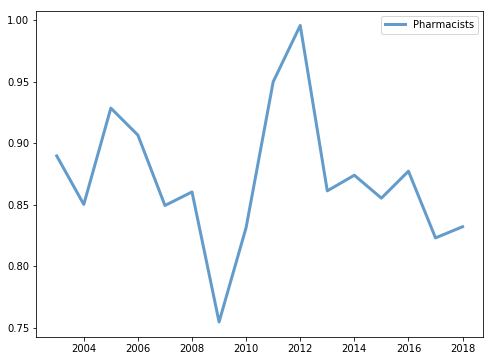

In [464]:
years = range(2003, 2019)
for occupation in df_combined_all_sorted.index[:1]:
    
    percent_female = df_combined_all_sorted.loc[occupation]['Percent Female'][::-1]
    total_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Total Weekly Pay'][::-1])
    female_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Female Weekly Pay'][::-1])
    male_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Male Weekly Pay'][::-1])
    pay_gap = [x/y for x, y in zip(female_weekly_pay, male_weekly_pay)]
    thinkplot.Plot(years, pay_gap, label=occupation)

thinkplot.Show()

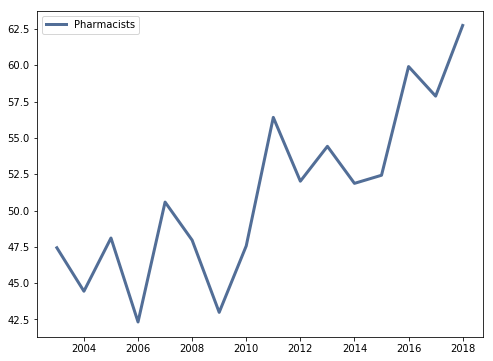

In [465]:
years = range(2003, 2019)
for occupation in df_combined_all_sorted.index[:1]:
    
    percent_female = df_combined_all_sorted.loc[occupation]['Percent Female'][::-1]
    total_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Total Weekly Pay'][::-1])
    female_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Female Weekly Pay'][::-1])
    male_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Male Weekly Pay'][::-1])
    thinkplot.Plot(years, percent_female, label=occupation)

thinkplot.Show()

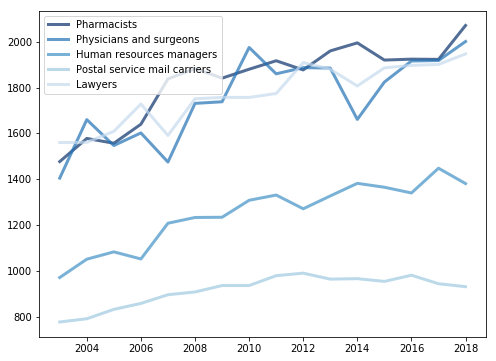

In [460]:
years = range(2003, 2019)
for occupation in df_combined_all_sorted.index[:5]:
    
    percent_female = df_combined_all_sorted.loc[occupation]['Percent Female'][::-1]
    total_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Total Weekly Pay'][::-1])
    female_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Female Weekly Pay'][::-1])
    male_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Male Weekly Pay'][::-1])
    thinkplot.Plot(years, total_weekly_pay, label=occupation)

thinkplot.Show()

In [212]:
df_combined_new['Percent Female Change'] = pd.Series()
df_combined_new['Female Weekly Pay Change'] = pd.Series()
percent_female_changes = []
female_weekly_pay_changes = []
for occupation in df_combined_new.index:
    percent_female = df_combined_new.loc[occupation]['Percent Female']
    female_weekly_pay = df_combined_new.loc[occupation]['Female Weekly Pay']
    
    #percent_female_change = abs(percent_female[0]-percent_female[-1])
    percent_female_change = percent_female[0]-percent_female[-1]
    female_weekly_pay_change = find_diff(female_weekly_pay[0],female_weekly_pay[-1])
        
    percent_female_changes.append(percent_female_change)
    female_weekly_pay_changes.append(female_weekly_pay_change)
    
df_combined_new['Percent Female Change'] = percent_female_changes
df_combined_new['Female Weekly Pay Change'] = female_weekly_pay_changes

Sort by percent female change

In [453]:
df_combined_sorted = df_combined_new.sort_values(by=['Percent Female Change'], ascending=False)
df_combined_sorted.iloc[:10]

,Percent Female,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Percent Female Change,Female Weekly Pay Change
Occupation,,,,,,
Compliance officers,"[53.597122302158276, 55.833333333333336, 57.93...","[1296, 1391, 1243, 1198, 1,157, 1,124, 1,183, ...","[1165, 1296, 1163, 1025, 1,092, 1,081, 999, 995]","[1450, 1501, 1274, 1375, 1,237, 1,170, 1,304, ...",9.278940,170
Postal service mail carriers,"[40.97222222222222, 40.6015037593985, 39.14473...","[931, 944, 981, 954, 966, 964, 990, 979]","[808, 856, 931, 854, 851, 878, 907, 892]","[983, 965, 1020, 1021, 1,025, 1,012, 1,026, 1,...",8.628988,84
Bakers,"[58.94039735099338, 50.37037037037037, 60.1449...","[549, 472, 494, 505, 492, 505, 474, 448]","[533, 464, 480, 475, 469, 524, 450, 416]","[565, 488, 562, 570, 518, 488, 501, 471]",8.540397,117
Physical therapists,"[66.50717703349282, 64.83516483516483, 64.9746...","[1395, 1317, 1325, 1265, 1,387, 1,382, 1,287, ...","[1387, 1297, 1306, 1215, 1,307, 1,300, 1,190, ...","[1410, 1341, 1348, 1347, 1,478, 1,457, 1,362, ...",6.918136,171
Miscellaneous agricultural workers,"[20.2808112324493, 18.116975748930102, 16.8437...","[552, 517, 508, 445, 421, 428, 426, 419]","[474, 453, 423, 398, 369, 352, 350, 370]","[578, 553, 524, 460, 437, 447, 444, 427]",6.652493,104
Physicians and surgeons,"[42.563482466747274, 43.190184049079754, 38.21...","[2001, 1918, 1916, 1824, 1,661, 1,885, 1,887, ...","[1677, 1759, 1476, 1533, 1,246, 1,497, 1,418, ...","[2513, 2277, 2343, 1915, 2,002, 2,087, 2,099, ...",6.612348,150
Pharmacists,"[62.737642585551335, 57.874015748031496, 59.90...","[2071, 1923, 1924, 1920, 1,995, 1,960, 1,877, ...","[1890, 1834, 1839, 1811, 1,902, 1,802, 1,871, ...","[2271, 2228, 2096, 2117, 2,176, 2,092, 1,879, ...",6.327386,8
Laborers and freight stock and material movers hand,"[19.93730407523511, 17.517241379310345, 15.596...","[603, 578, 566, 526, 533, 511, 510, 509]","[541, 500, 509, 455, 476, 421, 476, 416]","[620, 595, 580, 547, 546, 524, 519, 520]",6.048415,125
Lawyers,"[40.328253223915596, 43.149807938540334, 40.13...","[1947, 1901, 1897, 1886, 1,807, 1,880, 1,909, ...","[1762, 1753, 1619, 1717, 1,590, 1,566, 1,636, ...","[2202, 2105, 2086, 1914, 1,915, 1,986, 2,055, ...",5.953253,131


In [451]:
def clean_pay(pays):
    cleaned_pay = []
    for pay in pays:
        if type(pay) == str:
            pay = pay.replace('$', '')
            pay = pay.replace(',', '')
            pay = int(pay)
        cleaned_pay.append(pay)
    return cleaned_pay

Plot data

In [221]:
def clean_pay(pays):
    cleaned_pay = []
    for pay in pays:
        if type(pay) == str:
            pay = pay.replace('$', '')
            pay = pay.replace(',', '')
            pay = int(pay)
        cleaned_pay.append(pay)
    return cleaned_pay

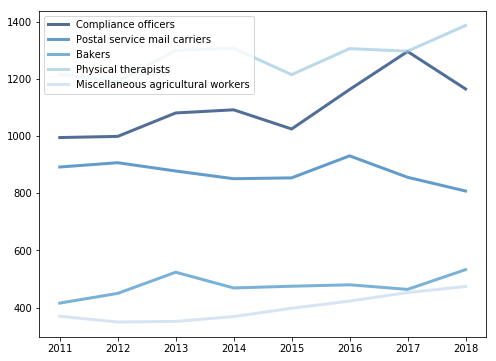

In [222]:
years = range(2011, 2019)
for occupation in df_combined_sorted.index[:5]:
    
    percent_female = df_combined_sorted.loc[occupation]['Percent Female'][::-1]
    total_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Total Weekly Pay'][::-1])
    female_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Female Weekly Pay'][::-1])
    male_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Male Weekly Pay'][::-1])
    
    thinkplot.Plot(years, female_weekly_pay, label=occupation)

thinkplot.Show()

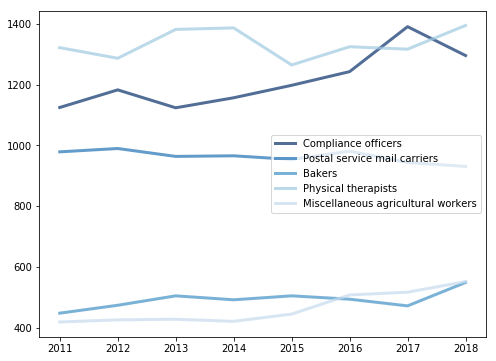

In [223]:
years = range(2011, 2019)
for occupation in df_combined_sorted.index[:5]:
    
    percent_female = df_combined_sorted.loc[occupation]['Percent Female'][::-1]
    total_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Total Weekly Pay'][::-1])
    female_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Female Weekly Pay'][::-1])
    male_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Male Weekly Pay'][::-1])
    
    thinkplot.Plot(years, total_weekly_pay, label=occupation)

thinkplot.Show()

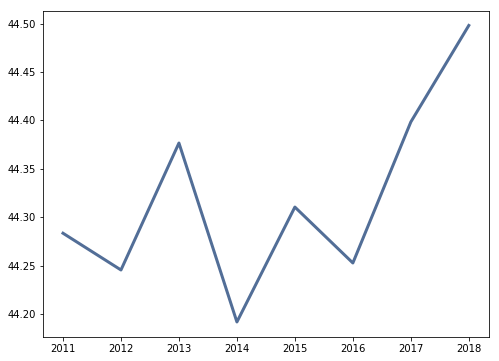

In [191]:
years = range(2011, 2019)
thinkplot.Plot(years, percent_female)
thinkplot.Show()